In [180]:
# Подключение библиотек

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from pylab import rcParams
import itertools
import time
from sklearn.preprocessing import MaxAbsScaler

Описание:

В качестве тренировочных данных представляется датасет с историей заказов 20000 пользователей вплоть до даты отсечки, которая разделяет тренировочные и тестовые данные по времени.

train.csv:
user_id - уникальный id пользователя
order_completed_at - дата заказа
cart - список уникальных категорий (category_id), из которых состоял заказ
В качестве прогноза необходимо для каждой пары пользователь-категория из примера сабмита вернуть 1, если категория будет присутствовать в следующем заказе пользователя, или 0 в ином случае. Список категорий для каждого пользователя примере сабмита - это все категории, которые он когда-либо заказывал.

sample_submission.csv:
Пример сабмита. В тест входят не все пользователи из тренировочных данных, так как некоторые из них так ничего и не заказали после даты отсечки.

id - идентификатор строки - состоит из user_id и category_id, разделенных точкой с запятой: f'{user_id};{category_id}'. Из-за особенностей проверяющей системы Kaggle InClass, использовать колонки user_id, category_id в качестве индекса отдельно невозможно
target - 1 или 0 - будет ли данная категория присутствовать в следующем заказе пользователя

In [2]:
df = pd.read_csv("C://Users//Ergney//Downloads//data//train.csv", encoding="utf-8")

In [3]:
df.head(10)

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
5,2,2015-03-22 09:25:46,82
6,2,2015-03-22 09:25:46,134
7,2,2015-03-22 09:25:46,16
8,2,2015-03-22 09:25:46,409
9,2,2015-03-22 09:25:46,384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123064 entries, 0 to 3123063
Data columns (total 3 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   user_id             int64 
 1   order_completed_at  object
 2   cart                int64 
dtypes: int64(2), object(1)
memory usage: 71.5+ MB


In [5]:
#Думаю здесь будет уместо рассмотреть данные на примере нескольких конкретных юзеров. 
#Пусть это будут 1, 2 и самый тот кто приобрел больше всего товаров.

top_user_id = df['user_id'].mode()[0]

df.loc[df['user_id'] == 1].head(10)

,user_id,order_completed_at,cart
65467,1,2019-05-08 16:09:41,55
709747,1,2020-01-17 14:44:23,82
709748,1,2020-01-17 14:44:23,798
709749,1,2020-01-17 14:44:23,86
709750,1,2020-01-17 14:44:23,421
709751,1,2020-01-17 14:44:23,204
709752,1,2020-01-17 14:44:23,55
800645,1,2020-02-06 22:46:55,55
921504,1,2020-03-02 13:43:20,23
921505,1,2020-03-02 13:43:20,14


In [6]:
df.loc[df['user_id'] == 2].head(10)

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157
5,2,2015-03-22 09:25:46,82
6,2,2015-03-22 09:25:46,134
7,2,2015-03-22 09:25:46,16
8,2,2015-03-22 09:25:46,409
9,2,2015-03-22 09:25:46,384


In [7]:
df.loc[df['user_id'] == top_user_id].head(10)

,user_id,order_completed_at,cart
26323,380,2018-09-26 19:14:06,61
26324,380,2018-09-26 19:14:06,402
26325,380,2018-09-26 19:14:06,400
26326,380,2018-09-26 19:14:06,57
26327,380,2018-09-26 19:14:06,43
26328,380,2018-09-26 19:14:06,376
26329,380,2018-09-26 19:14:06,379
26330,380,2018-09-26 19:14:06,383
26331,380,2018-09-26 19:14:06,398
26332,380,2018-09-26 19:14:06,101


In [8]:
# Попробую визуализировать некоторые статитстики в виде графиков. 

In [9]:
# Построение графика, отражающего колличество купленных товаров каждой категории для одного пользователя.

def get_graph_products_count_for_user(df, user_id):
    
    user = df['cart'].loc[df['user_id'] == user_id].value_counts()
    
    size = user.shape[0]
    
    rcParams["figure.figsize"] = size/3.5, size/2.7
    
    title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
    }
    
    label_font = {
    "fontsize": 12,
    "family": "serif",
    }
    
    user.plot(kind="barh", label='ID товара', ec="black")
    plt.xlabel("Колличество покупок товара", fontdict=label_font)
    plt.title(f"График колличества приобритений различных товаров пользователя {user_id}", fontdict=title_font)
    plt.ylabel("ID товара", fontdict=label_font)
    plt.show()

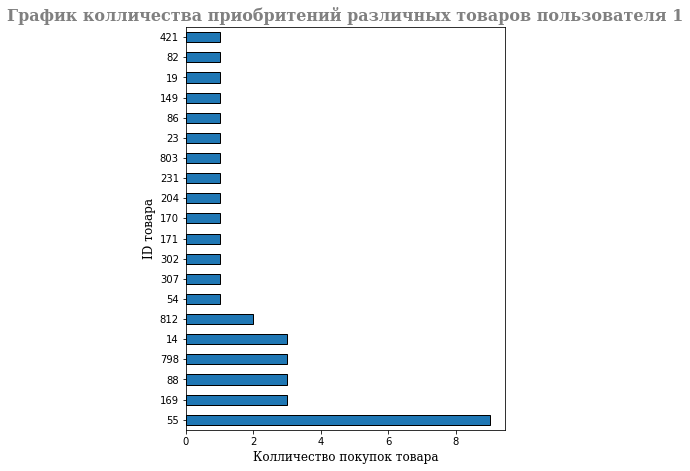

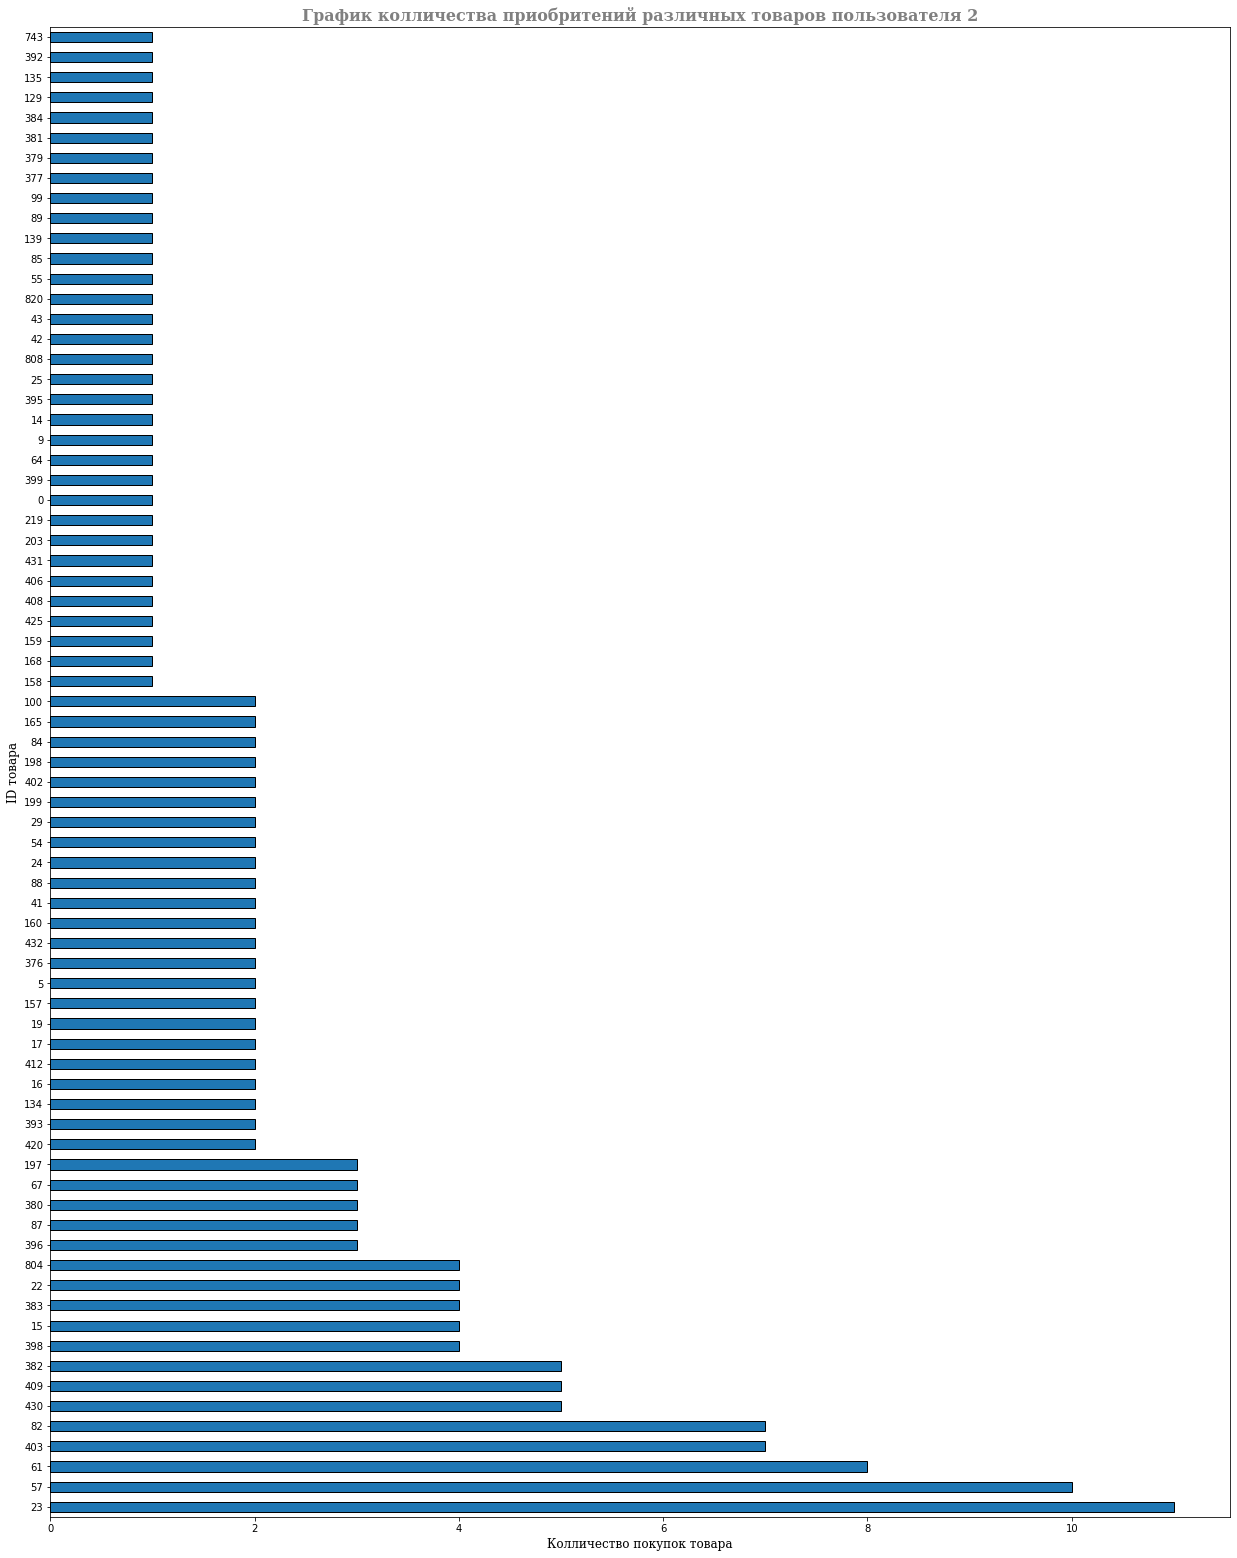

In [10]:
get_graph_products_count_for_user(df, 1)
get_graph_products_count_for_user(df, 2)
#get_graph_products_count_for_user(df, top_user_id)

In [11]:
dates = df['order_completed_at'].values
dates.max(), dates.min()

('2020-09-03 23:45:45', '2015-03-22 09:25:46')

In [12]:
# Теперь побую графики которые будет отражать активность пользователя по кварталам.

def get_graph_activites_user_for_time(df, user_id):
    data = df['order_completed_at'].loc[df['user_id'] == user_id].values
    # idx = df['order_completed_at'].loc[df['user_id'] == user_id].index
    
    dict_quarter = {}
    years = [i for i in range(2015, 2021)]
    quarters = [1, 4, 7, 10]
    for year, quarter_idx in itertools.product(years, range(4)):
        dict_quarter[f'{year}-{quarter_idx+1}'] = 0
        if quarter_idx < 3:
            start_quarter = datetime.strptime(f'{year}.{quarters[quarter_idx]}', '%Y.%m')
            end_quarter = datetime.strptime(f'{year}.{quarters[quarter_idx+1]}', '%Y.%m')
        else:
            start_quarter = datetime.strptime(f'{year}.{quarters[quarter_idx]}', '%Y.%m')
            end_quarter = datetime.strptime(f'{year+1}.{quarters[-1]}', '%Y.%m')
        for i in data:
            date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
            if start_quarter < date < end_quarter:
                dict_quarter[f'{year}-{quarter_idx+1}'] += 1
                
    result = pd.Series(dict_quarter)
    
    rcParams["figure.figsize"] = 12, 9
                
    title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
    }
    
    label_font = {
    "fontsize": 12,
    "family": "serif",
    }

    result.plot(kind="bar", label="Колличество покупок", ec="black")
    plt.title(f"График колличества приобритений различных товаров пользователя {user_id}", fontdict=title_font)
    plt.xlabel("Квартал", fontdict=label_font)
    plt.ylabel("Колличество покупок", fontdict=label_font)
    plt.show()

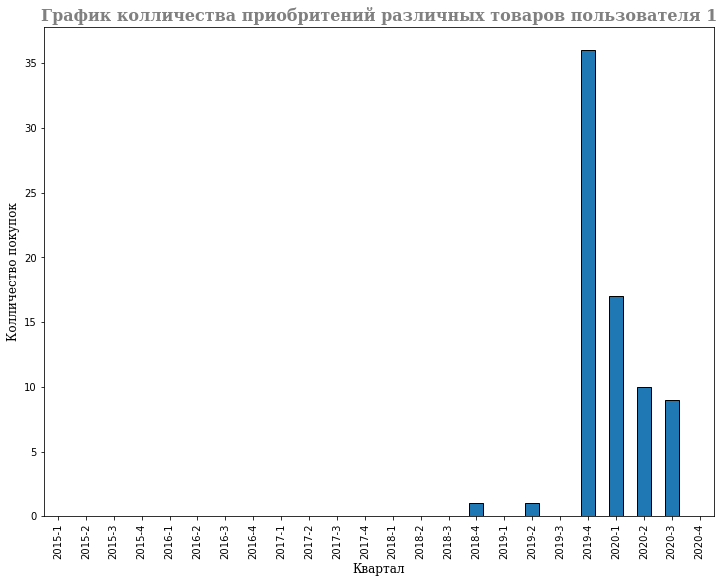

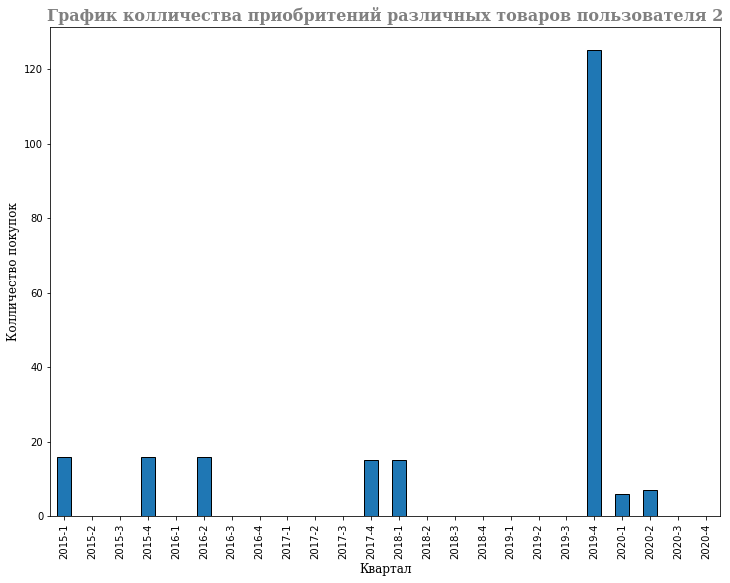

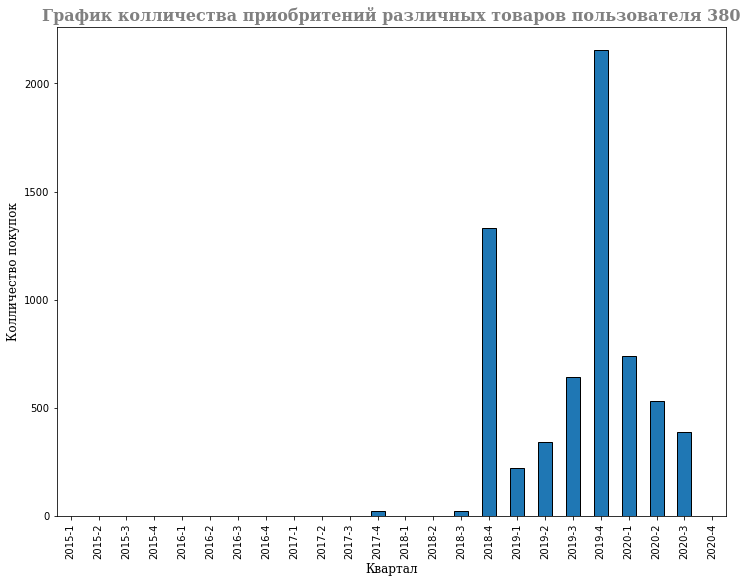

In [13]:
get_graph_activites_user_for_time(df, 1)
get_graph_activites_user_for_time(df, 2)
get_graph_activites_user_for_time(df, top_user_id)

Думаю для предсказаний следующие признаки будут значимы:

    1.Делал ли вообще покупки пользователь за последний квартал\год\два\три.
    2.Делал ли пользователь покупки из данной категории за последний квартал\полугодие\год\два\три.
    3.Колличество покупок из данной категории за квартал\год\всё время.
    4.Доля покупок от всех из данной категории за квартал\год\всё время.
    5.Колличество дней с момента последней покупки.
    6.Колличество дней с момента последней покупки в категории.
    
Так же на основе этих признаков можно придумать ещё некоторые. Например:

    1.Повышение интереса пользователя к категории на данный момент. Считаться будет как повышение абсолютного количества\доли приобретенных товаров из категории по кварталам\годам.
    2.Снижение интереса пользователя к категории на данный момент. Считаться будет аналогично, но в обратную сторону.
    3.Снижение желания пользователя вообще покупать что-либо. Считаться будет как снижение абсолютного количества приобретенных товаров по кварталам\годам.

In [127]:
class Datatransform:

    def __init__(self):
        self.last_date = '2020-09-03 23:45:45'
        self.last_date_f = datetime.strptime(self.last_date, '%Y-%m-%d %H:%M:%S')

    def _get_date_delta(self, dft):
        date = dft['order_completed_at'].max()
        date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        delta = (self.last_date_f - date).days
        return delta

    def _get_categorys(self, df_u):
        yield from np.unique(df_u['cart'])

    def _get_users(self, df):
        yield from np.unique(df['user_id'])

    def _get_data(self, df):
        data = []
        count = 0

        last_month_datetime = '2020-08-03 23:45:45'
        last_quarter_datetime = '2020-06-03 23:45:45'
        last_years_datetime = '2019-06-03 23:45:45'
        last_three_years_datetime = '2017-06-03 23:45:45'

        for user_id in self._get_users(df=df):

            df_u = df.loc[df['user_id'] == user_id]

            buy_in_this_m = df_u.loc[(df_u['order_completed_at'] > last_month_datetime)].shape[0]
            buy_in_this_q = df_u.loc[(df_u['order_completed_at'] > last_quarter_datetime)].shape[0]
            buy_in_this_y = df_u.loc[(df_u['order_completed_at'] > last_years_datetime)].shape[0]
            buy_in_this_3y = df_u.loc[(df_u['order_completed_at'] > last_three_years_datetime)].shape[0]
            buy_all = df_u.shape[0]
            

            last_buy = self._get_date_delta(dft=df_u)
            

            for category_id in self._get_categorys(df_u=df_u):
                df_uc = df_u.loc[df['cart'] == category_id]
                count += 1
                

                c_buy_in_this_m = df_uc.loc[(df_uc['order_completed_at'] > last_month_datetime)].shape[0]
                c_buy_in_this_q = df_uc.loc[(df_uc['order_completed_at'] > last_quarter_datetime)].shape[0]
                c_buy_in_this_y = df_uc.loc[(df_uc['order_completed_at'] > last_years_datetime)].shape[0]
                c_buy_in_this_3y = df_uc.loc[df_uc['order_completed_at'] > last_three_years_datetime].shape[0]

                c_by_all = df_uc.shape[0]

                c_last_buy = self._get_date_delta(dft=df_uc)

                idx = f'{user_id};{category_id}'

                data.append([idx, buy_in_this_m, buy_in_this_q, buy_in_this_y, buy_in_this_3y,
                             buy_all, last_buy, c_buy_in_this_m, c_buy_in_this_q, c_buy_in_this_y,
                             c_buy_in_this_3y, c_by_all, c_last_buy])
                

   
        columns = ['id','buy_in_this_m', 'buy_in_this_q', 'buy_in_this_y', 'buy_in_this_3y',
                               'buy_all', 'last_buy', 'c_buy_in_this_m', 'c_buy_in_this_q', 'c_buy_in_this_y',
                               'c_buy_in_this_3y', 'c_by_all', 'c_last_buy']
    
        result = pd.DataFrame(data=data, columns=columns)
    
        return result

    def transform(self, df):
        start_time = time.time()
        
        data = self._get_data(df)
        #data[columns] = data[columns].astype("int64", errors='ignore')
        data['share_category'] = data['c_by_all'] / data['buy_all']
        
        data.loc[data['buy_in_this_y'] != 0, 'share_category_in_this_y'] = data['c_buy_in_this_y'] / data['buy_in_this_y']
        data.loc[data['buy_in_this_q'] != 0, 'share_category_in_this_q'] = data['c_buy_in_this_q'] / data['buy_in_this_q']
        data.loc[data['buy_in_this_m'] != 0, 'share_category_in_this_m'] = data['c_buy_in_this_m'] / data['buy_in_this_m']
        
        data['share_category_in_this_y'] = data['share_category_in_this_y'].fillna(0)
        data['share_category_in_this_q'] = data['share_category_in_this_q'].fillna(0)
        data['share_category_in_this_m'] = data['share_category_in_this_m'].fillna(0)
        
        data.loc[data['c_by_all'] != 0, 'interest_category_in_m'] = data['c_buy_in_this_m'] / data['c_by_all']
        data.loc[data['c_by_all'] != 0, 'interest_category_in_q'] = data['c_buy_in_this_q'] / data['c_by_all']
        data.loc[data['c_by_all'] != 0, 'interest_category_in_y'] = data['c_buy_in_this_y'] / data['c_by_all']
        
        data['interest_category_in_m'] = data['interest_category_in_m'].fillna(0)
        data['interest_category_in_q'] = data['interest_category_in_q'].fillna(0)
        data['interest_category_in_y'] = data['interest_category_in_y'].fillna(0)
        
        data['interest_buy_y'] = data['buy_in_this_y'] / data['buy_all']
        data['interest_buy_q'] = data['buy_in_this_q'] / data['buy_all']
        data['interest_buy_m'] = data['buy_in_this_m'] / data['buy_all']
        
        print("--- %s seconds ---" % (time.time() - start_time))
        
        return data

In [128]:
transform = Datatransform()
#new_data = transform.transform(df[0:1000])
#new_data = transform.transform(df[0:10000])
#new_data = transform.transform(df[0:40000])
#new_data = transform.transform(df[0:100000])
#new_data = transform.transform(df[0:200000])
#new_data = transform.transform(df[0:500000])

In [129]:
new_data = transform.transform(df)

--- 4987.852967739105 seconds ---


In [130]:
new_data.to_csv("newdata.csv")

In [131]:
new_data.describe()

,buy_in_this_m,buy_in_this_q,buy_in_this_y,buy_in_this_3y,buy_all,last_buy,c_buy_in_this_m,c_buy_in_this_q,c_buy_in_this_y,c_buy_in_this_3y,...,share_category,share_category_in_this_y,share_category_in_this_q,share_category_in_this_m,interest_category_in_m,interest_category_in_q,interest_category_in_y,interest_buy_y,interest_buy_q,interest_buy_m
count,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,...,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06
mean,3.165059e+01,9.548469e+01,2.422120e+02,2.506304e+02,2.510547e+02,2.295926e+01,4.157883e-01,1.227003e+00,2.724398e+00,2.791458e+00,...,1.789549e-02,1.789549e-02,1.789549e-02,1.190497e-02,1.743650e-01,5.092602e-01,9.839089e-01,9.839760e-01,5.097836e-01,1.753343e-01
std,3.729503e+01,9.157861e+01,2.628811e+02,2.827059e+02,2.840484e+02,2.427296e+01,7.989967e-01,1.685089e+00,3.720766e+00,3.898331e+00,...,1.987905e-02,2.004907e-02,2.841791e-02,2.942994e-02,3.278185e-01,4.408704e-01,1.092270e-01,7.834173e-02,3.139603e-01,2.106081e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.850627e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482480e-02,1.550388e-03,0.000000e+00
25%,0.000000e+00,3.400000e+01,7.800000e+01,7.900000e+01,7.900000e+01,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,6.269592e-03,6.230530e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.445652e-01,0.000000e+00
50%,2.100000e+01,6.600000e+01,1.510000e+02,1.540000e+02,1.540000e+02,1.300000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.265823e-02,1.265823e-02,1.052632e-02,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,4.391534e-01,1.128205e-01
75%,4.800000e+01,1.280000e+02,3.050000e+02,3.120000e+02,3.120000e+02,3.600000e+01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,...,2.352941e-02,2.352941e-02,2.564103e-02,1.470588e-02,2.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.804878e-01,2.500000e-01
max,3.920000e+02,1.056000e+03,2.965000e+03,3.508000e+03,3.508000e+03,8.900000e+01,2.900000e+01,7.800000e+01,1.960000e+02,1.960000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [132]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117600 entries, 0 to 1117599
Data columns (total 23 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1117600 non-null  object 
 1   buy_in_this_m             1117600 non-null  int64  
 2   buy_in_this_q             1117600 non-null  int64  
 3   buy_in_this_y             1117600 non-null  int64  
 4   buy_in_this_3y            1117600 non-null  int64  
 5   buy_all                   1117600 non-null  int64  
 6   last_buy                  1117600 non-null  int64  
 7   c_buy_in_this_m           1117600 non-null  int64  
 8   c_buy_in_this_q           1117600 non-null  int64  
 9   c_buy_in_this_y           1117600 non-null  int64  
 10  c_buy_in_this_3y          1117600 non-null  int64  
 11  c_by_all                  1117600 non-null  int64  
 12  c_last_buy                1117600 non-null  int64  
 13  share_category            1

In [134]:
target = pd.read_csv("C://Users//Ergney//Downloads//data//sample_submission.csv")

In [144]:
full_data = pd.merge(new_data, target, on='id', how='outer')

In [145]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117600 entries, 0 to 1117599
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1117600 non-null  object 
 1   buy_in_this_m             1117600 non-null  int64  
 2   buy_in_this_q             1117600 non-null  int64  
 3   buy_in_this_y             1117600 non-null  int64  
 4   buy_in_this_3y            1117600 non-null  int64  
 5   buy_all                   1117600 non-null  int64  
 6   last_buy                  1117600 non-null  int64  
 7   c_buy_in_this_m           1117600 non-null  int64  
 8   c_buy_in_this_q           1117600 non-null  int64  
 9   c_buy_in_this_y           1117600 non-null  int64  
 10  c_buy_in_this_3y          1117600 non-null  int64  
 11  c_by_all                  1117600 non-null  int64  
 12  c_last_buy                1117600 non-null  int64  
 13  share_category            1

In [146]:
full_data['target'] = full_data['target'].fillna(0.0)

In [147]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117600 entries, 0 to 1117599
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1117600 non-null  object 
 1   buy_in_this_m             1117600 non-null  int64  
 2   buy_in_this_q             1117600 non-null  int64  
 3   buy_in_this_y             1117600 non-null  int64  
 4   buy_in_this_3y            1117600 non-null  int64  
 5   buy_all                   1117600 non-null  int64  
 6   last_buy                  1117600 non-null  int64  
 7   c_buy_in_this_m           1117600 non-null  int64  
 8   c_buy_in_this_q           1117600 non-null  int64  
 9   c_buy_in_this_y           1117600 non-null  int64  
 10  c_buy_in_this_3y          1117600 non-null  int64  
 11  c_by_all                  1117600 non-null  int64  
 12  c_last_buy                1117600 non-null  int64  
 13  share_category            1

In [149]:
full_data.to_csv("full_data.csv")

In [148]:
full_data['target'].value_counts()

0.0    721745
1.0    395855
Name: target, dtype: int64

<AxesSubplot:>

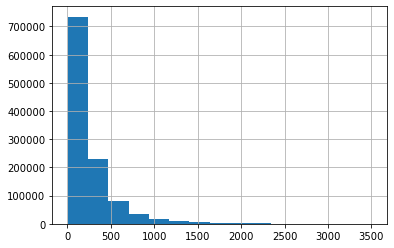

In [150]:
full_data['buy_all'].hist(bins=15)

<AxesSubplot:>

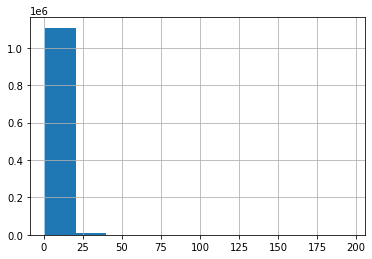

In [153]:
full_data['c_by_all'].hist(bins=10)

In [152]:
full_data['c_by_all'].max()

196

In [181]:
# Нормализация данных.

scaler = MaxAbsScaler()

NUMERIC_FEATURE = ['buy_in_this_m','buy_in_this_q','buy_in_this_y','buy_in_this_3y','buy_all',
                   'last_buy', 'c_buy_in_this_m', 'c_buy_in_this_q', 'c_buy_in_this_y', 'c_buy_in_this_3y',
                  'c_by_all', 'c_last_buy']

full_data_norm = full_data.copy()
full_data_norm[NUMERIC_FEATURE] = scaler.fit_transform(full_data_norm[NUMERIC_FEATURE])

In [182]:
full_data_norm.describe()

,buy_in_this_m,buy_in_this_q,buy_in_this_y,buy_in_this_3y,buy_all,last_buy,c_buy_in_this_m,c_buy_in_this_q,c_buy_in_this_y,c_buy_in_this_3y,...,share_category_in_this_y,share_category_in_this_q,share_category_in_this_m,interest_category_in_m,interest_category_in_q,interest_category_in_y,interest_buy_y,interest_buy_q,interest_buy_m,target
count,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,...,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06,1.117600e+06
mean,8.074131e-02,9.042111e-02,8.169039e-02,7.144538e-02,7.156634e-02,2.579692e-01,1.433753e-02,1.573080e-02,1.389999e-02,1.424213e-02,...,1.789549e-02,1.789549e-02,1.190497e-02,1.743650e-01,5.092602e-01,9.839089e-01,9.839760e-01,5.097836e-01,1.753343e-01,3.542010e-01
std,9.514039e-02,8.672217e-02,8.866142e-02,8.058891e-02,8.097160e-02,2.727298e-01,2.755161e-02,2.160371e-02,1.898350e-02,1.988944e-02,...,2.004907e-02,2.841791e-02,2.942994e-02,3.278185e-01,4.408704e-01,1.092270e-01,7.834173e-02,3.139603e-01,2.106081e-01,4.782707e-01
min,0.000000e+00,9.469697e-04,3.372681e-04,8.551881e-04,8.551881e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482480e-02,1.550388e-03,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.219697e-02,2.630691e-02,2.251995e-02,2.251995e-02,4.494382e-02,0.000000e+00,0.000000e+00,5.102041e-03,5.102041e-03,...,6.230530e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.445652e-01,0.000000e+00,0.000000e+00
50%,5.357143e-02,6.250000e-02,5.092749e-02,4.389966e-02,4.389966e-02,1.460674e-01,0.000000e+00,1.282051e-02,5.102041e-03,5.102041e-03,...,1.265823e-02,1.052632e-02,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,4.391534e-01,1.128205e-01,0.000000e+00
75%,1.224490e-01,1.212121e-01,1.028668e-01,8.893957e-02,8.893957e-02,4.044944e-01,3.448276e-02,2.564103e-02,1.530612e-02,1.530612e-02,...,2.352941e-02,2.564103e-02,1.470588e-02,2.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.804878e-01,2.500000e-01,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# Разбиение на тренировочную и тестовую выборку.

feautre = full_data_norm.columns[1:-1]
x_train, x_test, y_train, y_test = train_test_split(full_data_norm[feautre], full_data_norm['target'], test_size=0.3, random_state=0)

In [185]:
x_train

,buy_in_this_m,buy_in_this_q,buy_in_this_y,buy_in_this_3y,buy_all,last_buy,c_buy_in_this_m,c_buy_in_this_q,c_buy_in_this_y,c_buy_in_this_3y,...,share_category,share_category_in_this_y,share_category_in_this_q,share_category_in_this_m,interest_category_in_m,interest_category_in_q,interest_category_in_y,interest_buy_y,interest_buy_q,interest_buy_m
1067373,0.020408,0.035038,0.012479,0.010547,0.010547,0.078652,0.000000,0.012821,0.005102,0.005102,...,0.027027,0.027027,0.027027,0.000000,0.000000,1.000000,1.0,1.0,1.000000,0.216216
463199,0.071429,0.026515,0.034064,0.028791,0.028791,0.101124,0.034483,0.012821,0.005102,0.005102,...,0.009901,0.009901,0.035714,0.035714,1.000000,1.000000,1.0,1.0,0.277228,0.277228
606665,0.107143,0.039773,0.023946,0.020239,0.020239,0.011236,0.034483,0.012821,0.005102,0.005102,...,0.014085,0.014085,0.023810,0.023810,1.000000,1.000000,1.0,1.0,0.591549,0.591549
121802,0.283163,0.359848,0.323777,0.273660,0.273660,0.000000,0.137931,0.128205,0.071429,0.071429,...,0.014583,0.014583,0.026316,0.036036,0.285714,0.714286,1.0,1.0,0.395833,0.115625
705088,0.058673,0.143939,0.087690,0.074116,0.074116,0.269663,0.000000,0.000000,0.005102,0.005102,...,0.003846,0.003846,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.584615,0.088462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,0.114796,0.070076,0.133221,0.112600,0.112600,0.044944,0.000000,0.000000,0.005102,0.005102,...,0.002532,0.002532,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.187342,0.113924
152315,0.035714,0.061553,0.076560,0.064709,0.064709,0.179775,0.000000,0.000000,0.010204,0.010204,...,0.008811,0.008811,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.286344,0.061674
963395,0.224490,0.169508,0.060371,0.051026,0.051026,0.044944,0.034483,0.012821,0.005102,0.005102,...,0.005587,0.005587,0.005587,0.011364,1.000000,1.000000,1.0,1.0,1.000000,0.491620
117952,0.145408,0.177083,0.156492,0.132269,0.132269,0.044944,0.000000,0.000000,0.005102,0.005102,...,0.002155,0.002155,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.403017,0.122845


In [186]:
# Балансировка целевой переменной.

#train_balancing = pd.concat([X_train, y_train], axis=1)
#train_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
#df_balanced[TARGET_NAME].value_counts()

In [208]:
# Проверка базовых моделей.

!pip install lightgbm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

In [209]:
LR_MODEL = LogisticRegression(max_iter=50000, random_state=0, tol=1e-6)
RF_MODEL = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=150, min_samples_leaf=3)
XGB_MODEL = XGBClassifier(random_state=0)
LGBM_MODEL = LGBMClassifier(random_state=0)
KNN_MODEL = KNeighborsClassifier(n_neighbors=10, weights="uniform", leaf_size=100)

In [201]:
LR_MODEL.fit(x_train, y_train)

prdict_train = LR_MODEL.predict(x_train)
predict_test = LR_MODEL.predict(x_test)

LR_f1_train = f1_score(y_train, prdict_train)
LR_f1_test = f1_score(y_test, predict_test)

print(f'F1 score for train: {LR_f1_train}')
print(f'F1 score for test: {LR_f1_test}')

F1 score for train: 0.1510124853806541
F1 score for test: 0.148493209588992


In [210]:
RF_MODEL.fit(x_train, y_train)

RF_prdict_train = RF_MODEL.predict(x_train)
RF_predict_test = RF_MODEL.predict(x_test)

RF_f1_train = f1_score(y_train, RF_prdict_train)
RF_f1_test = f1_score(y_test, RF_predict_test)

print(f'F1 score for train: {RF_f1_train}')
print(f'F1 score for test: {RF_f1_test}')

F1 score for train: 0.7644703608652191
F1 score for test: 0.47858429529669283


In [211]:
XGB_MODEL.fit(x_train, y_train)

XGB_prdict_train = XGB_MODEL.predict(x_train)
XGB_predict_test = XGB_MODEL.predict(x_test)

XGB_f1_train = f1_score(y_train, XGB_prdict_train)
XGB_f1_test = f1_score(y_test, XGB_predict_test)

print(f'F1 score for train: {XGB_f1_train}')
print(f'F1 score for test: {XGB_f1_test}')

C:\Users\Ergney\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score for train: 0.2607417786157808
F1 score for test: 0.24087076852112857


In [212]:
LGBM_MODEL.fit(x_train, y_train)

LGBM_prdict_train = LGBM_MODEL.predict(x_train)
LGBM_predict_test = LGBM_MODEL.predict(x_test)

LGBM_f1_train = f1_score(y_train, LGBM_prdict_train)
LGBM_f1_test = f1_score(y_test, LGBM_predict_test)

print(f'F1 score for train: {LGBM_f1_train}')
print(f'F1 score for test: {LGBM_f1_test}')

F1 score for train: 0.06892437931999017
F1 score for test: 0.06414173713257064


In [214]:
# Как виднно лучше всего справляется модель случайного леса. 
#По идее надо бы ещё подобрать гиперпараметры, но у меня нет столько времени.

x_train, x_test, y_train, y_test = train_test_split(full_data[feautre], full_data['target'], test_size=0.3, random_state=0)

In [215]:
RF_MODEL_2 = RandomForestClassifier(n_estimators=150)

RF_MODEL_2.fit(x_train, y_train)

RF2_prdict_train = RF_MODEL_2.predict(x_train)
RF2_predict_test = RF_MODEL_2.predict(x_test)

RF2_f1_train = f1_score(y_train, RF2_prdict_train)
RF2_f1_test = f1_score(y_test, RF2_predict_test)

print(f'F1 score for train: {RF2_f1_train}')
print(f'F1 score for test: {RF2_f1_test}')

F1 score for train: 0.8167186855044863
F1 score for test: 0.49275325042760326


In [216]:
FINAL_PREDICT = RF_MODEL_2.predict(full_data[feautre])

In [217]:
FINAL_PREDICT

array([1., 1., 1., ..., 0., 1., 0.])

In [219]:
FINAL_PREDICT = pd.DataFrame({'id':full_data['id'].values ,'target':FINAL_PREDICT})

In [220]:
FINAL_PREDICT

,id,target
0,0;5,1.0
1,0;10,1.0
2,0;14,1.0
3,0;20,0.0
4,0;22,1.0
...,...,...
1117595,19998;409,1.0
1117596,19998;415,0.0
1117597,19998;420,0.0
1117598,19998;798,1.0


In [227]:
FINAL_PREDICT.to_csv('FINAL_PREDICT.csv')

In [229]:
import pickle

In [230]:
MODEL_FILE_PATH = './model.pkl'

with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(RF_MODEL_2, file)